# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [1,10,100]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)
print "Samples - mean of the data"
display(samples - data.mean().round())
print "Samples - median of the data"
display(samples - data.median().round())

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,7057,9810,9568,1762,3293,1776
1,3366,5403,12974,4400,5977,1744
2,11594,7779,12144,3252,8035,3029


Samples - mean of the data


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,-4943.0,4014.0,1617.0,-1310.0,412.0,251.0
1,-8634.0,-393.0,5023.0,1328.0,3096.0,219.0
2,-406.0,1983.0,4193.0,180.0,5154.0,1504.0


Samples - median of the data


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,-1447.0,6183.0,4812.0,236.0,2477.0,810.0
1,-5138.0,1776.0,8218.0,2874.0,5161.0,778.0
2,3090.0,4152.0,7388.0,1726.0,7219.0,2063.0


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**
The three establishments have very different amount monetary values. 
Lets compare the samples in relation to the mean of the data. In order to do this we will subtract the median and mean to find out how much the values differ from the other samples in the data. 

If we look at the first feature: Fresh, we can see that the first customer has: 7057, second: 3366 and the third customer: 11594. I assume this gives us an indicatio on how much fresh food they sell. If we compare this to the median and mean of the data we find that customer 1 (index=0) and customer 2 (index=1) both are below in the fresh feature compared to the median and mean. While customer 3 (index=2) are above in the median but below in the mean. Here the median will likely give a better picture, which says that customer 3 lies above the majority of customer in purchasing fresh food. We can do a similar investigation for the other features, but we see that for all features customer 1, 2 and 3 is above the mean, except for the fresh feature. This tells me that maybe these 3 samples are not the most representative of the dataset. Customer 1 sells less frozen food than the mean, and customer 2 sells less milk than the mean. Other things to note is that customer 3 sells much more Delicatessen than the other samples and more detergents_paper. 


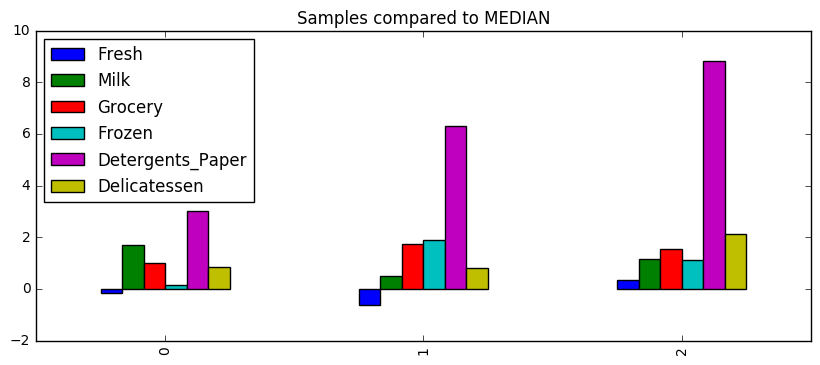

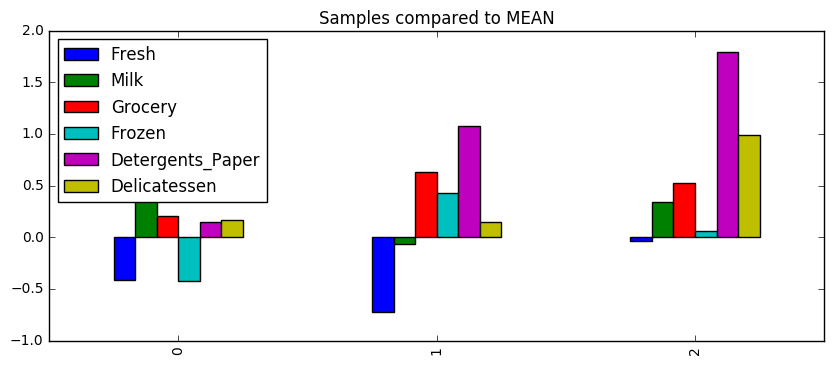

In [4]:
((samples-data.median()) / data.median()).plot.bar(figsize=(10,4), title='Samples compared to MEDIAN')
((samples-data.mean()) / data.mean()).plot.bar(figsize=(10,4), title='Samples compared to MEAN');

Above are a plot of the different samples compared to the mean and median. I am assuming that the the more the sample differ from the mean and median it will tell us something about what differentate the establishment in type of business. 
To get an idea of the number of customers the establishments serve we can take a look at the Paper feature. As this would likely scale with the customer amount, also cafes uses a huge amount of milk. Based on these two facts I would guess the first establishment (index=0) is in the cafe business because these to features dominate. The second establishment (index=1) looks more like a small market because because all the features are almost equally represented, however it is difficult to explain the high paper use. Finally the third establishment (index=3) is a bit more tricky, I would guess a larger high end retailer with a fresh food counter, or some kind of restaurant maybe to account for the high paper purchasing. At least it looks to be a big business, compared to the other customers.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [5]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.copy()
target=new_data["Fresh"]
new_data =new_data.drop("Fresh",1)

# TODO: Split the data into training and testing sets using the given feature as the target
from sklearn.cross_validation import train_test_split
X,y=new_data,target,

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.25, random_state=43)

# TODO: Create a decision tree regressor and fit it to the training set
from sklearn.tree import DecisionTreeRegressor
from sklearn import grid_search
parameters = {"max_depth":[10,20,30,50,100, None],"splitter":("random","best")}
regr=DecisionTreeRegressor()
regressor = grid_search.GridSearchCV(regr, parameters)
regressor.fit(X_train, y_train)



# TODO: Report the score of the prediction using the testing set
from sklearn.metrics import f1_score
y_pred=regressor.predict(X_test)
score = regressor.score(X_test,y_test)
print score

/Users/alexanderleirvag/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/alexanderleirvag/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


-0.621247883271


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**
I tried to predict the "Fresh" feature, using the decision tree regressor, and even doing grid search on the depth and splitter method.
I got an R^2 score of -0.85, meaning that the model failed to fit the data. Apparently the other features does not correlate much or can predict the customers spending in the fresh category. By doing a consideration I would say that any data in feature "Fresh" not redundant and cannot be represented or predicted through the other features. This means that it is hard/impossible for us to predict the spending habits of a customer in the Fresh category, was it not given. Therefore we need this feature, if we are to know what a customer spends in this product category.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

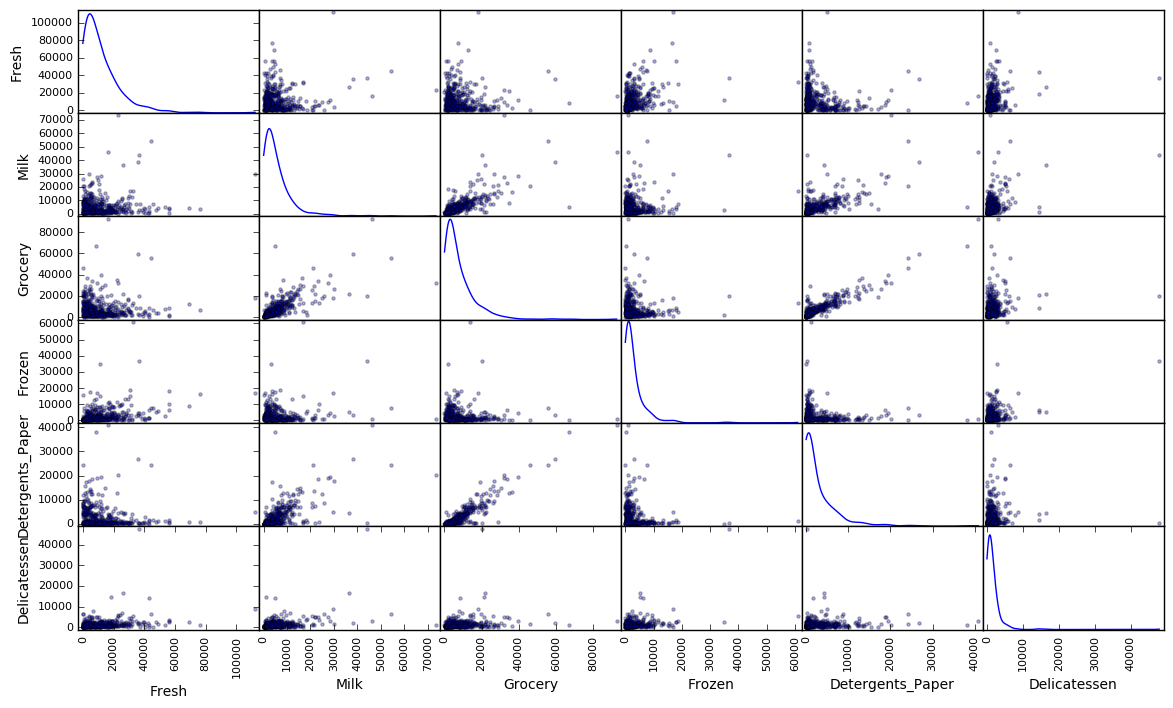

In [6]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**
The data is not normally distributed, the feature distributions appear to be skewed right (positive), or lognormal, with a mean greater than the median. To get an understanding of the correlation between the features the heatmap below is visualised.

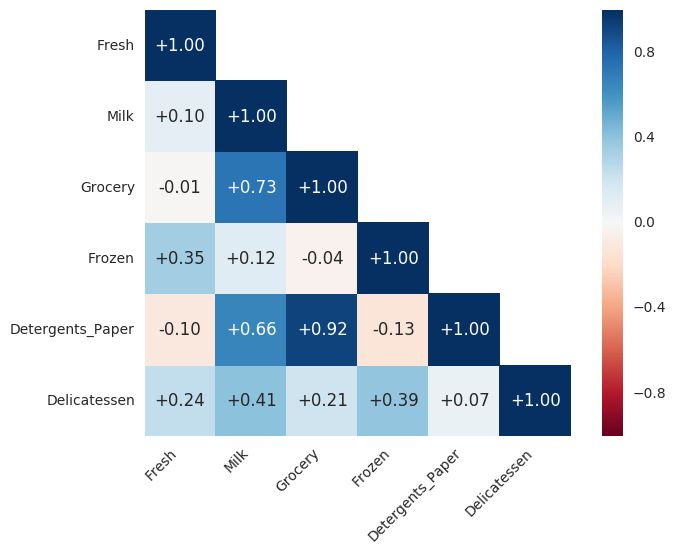

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=True, annot=True, cmap='RdBu', fmt='+.2f')
    plt.xticks(rotation=45, ha='right');

Here we see that the fresh feature does not correlate that much with the other features, indicating its importance. Considering that the correlation for the fresh features is lowest compared to the other feature correaltions, it may be the most important feaure. While the detergent_paper and milk features looks to be more correlating with the other features, being more reduntant.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

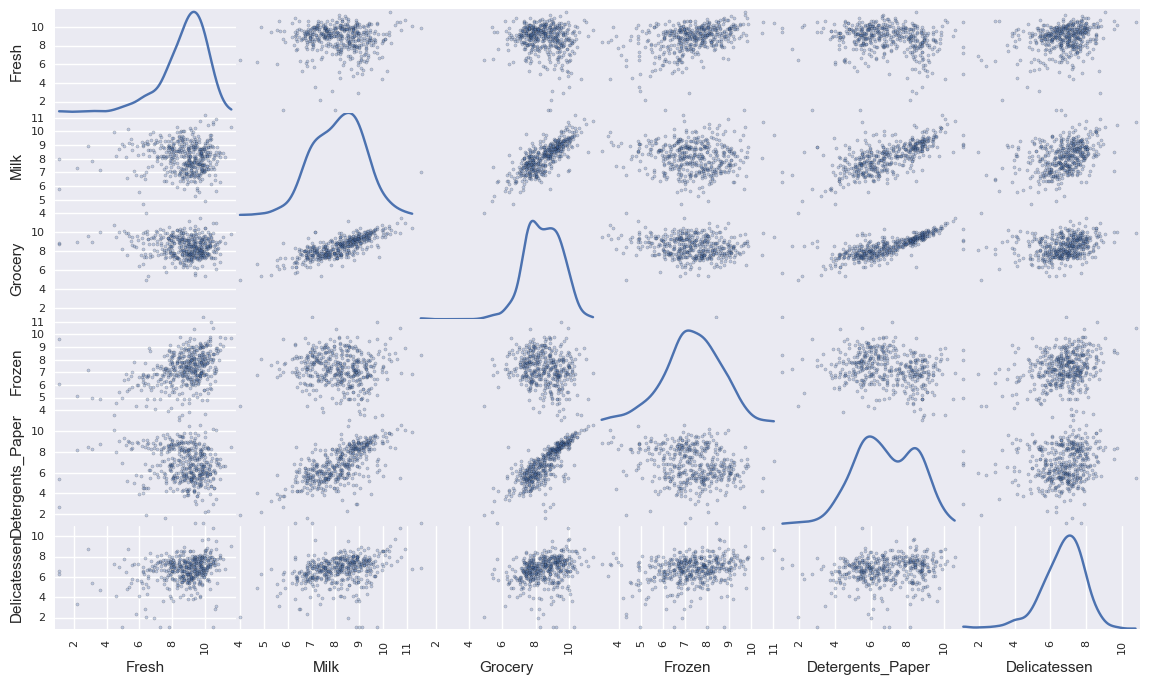

In [8]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data.copy())

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [9]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
1,8.121480,8.594710,9.470703,8.389360,8.695674,7.463937
2,9.358243,8.959183,9.404590,8.087025,8.991562,8.015988


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [21]:
outlier_count=[]
outliers_index=[]
from collections import Counter
c = Counter()

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1)*1.5
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    outlier_count.append((feature,len(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])))
    outliers_index.append(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index)
    c.update(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index.values)




# OPTIONAL: Select the indices for data points you wish to remove
print ("outlier index", outliers)
import itertools
outliers = list(itertools.chain(*outliers_index))
print (("Outliers that occurs for multiple features"), [k for k in c.keys() if c[k] > 1]) #set([x for x in outliers if outliers.count(x) > 1]) )

outliers=list(set(outliers))

# Remove the outliers, if any were specified
print ("Dropped %d outliers"%(len(outliers)))
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)
#After reviewing the good_data the samples with indices 1,10,100 were not found to be outliers.
good_samples=log_samples

print ("Number of outliers per feature:",(outlier_count))
print (("Total number of outliers across features"),sum([i[1] for i in outlier_count])   )       
print (("Number of customers that are outliers"),len(set(outliers)))



Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


('outlier index', [Int64Index([65, 66, 81, 95, 96, 128, 171, 193, 218, 304, 305, 338, 353, 355,
            357, 412],
           dtype='int64'), Int64Index([86, 98, 154, 356], dtype='int64'), Int64Index([75, 154], dtype='int64'), Int64Index([38, 57, 65, 145, 175, 264, 325, 420, 429, 439], dtype='int64'), Int64Index([75, 161], dtype='int64'), Int64Index([66, 109, 128, 137, 142, 154, 183, 184, 187, 203, 233, 285, 289,
            343],
           dtype='int64')])
('Outliers that occurs for multiple features', [128, 154, 65, 66, 75])
Dropped 42 outliers
('Number of outliers per feature:', [('Fresh', 16), ('Milk', 4), ('Grocery', 2), ('Frozen', 10), ('Detergents_Paper', 2), ('Delicatessen', 14)])
('Total number of outliers across features', 48)
('Number of customers that are outliers', 42)


### Question 4
*Are there any data points considered outliers for more than one feature? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**

All the features has at least one outlier. From the distribution it looks like the outliers will most likely skew any prediction and preprocessing. E.g when calculating the mean of the data and the variance for doing PCA, or for finding a good distribution for the data. As the number of customer outliers (42) are not that many compared to the total number of samples (440), and will likely skew any analysis I will remove them. 

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

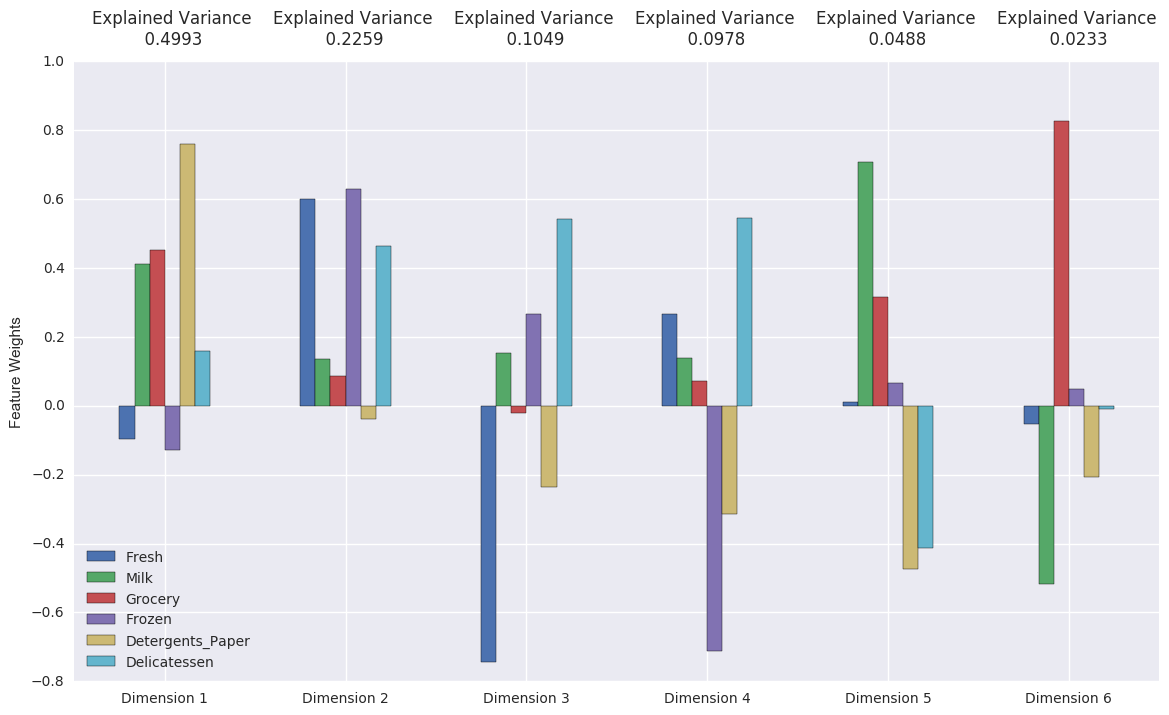

In [22]:
# TODO: Apply PCA to the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(good_data)
# TODO: Apply a PCA transformation to the sample log-data
pca_samples =pca.transform(log_samples) 

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**
After doing PCA it can be found that the first and second principal components explain 72,52% of the variance. The first 4 principal components explain 92,8% of the variance. The new dimensions can be considered to be new features that by maximizing the variance explain a previously hidden pattern for customer spending. Where the feature weights in the different dimensions explain the differences in customer spending pattern in the different dimensions. The first principal components is made up of weights with a large positive value for Fresh, and a bit smaller but still positive for Milk and Delicatessen. And large negative value in Frozen. This means that 55.8% of the variance in customer purchasing can be explained in large parts in different purchasing amount for these features. I.e some customers buy Fresh and milk together, and some purchase very little of these. A principal component which has opposite directions can explain what customers buy more of in one category and less of in the other category. For example a customer which buys more of fresh food and milk will buy less of frozen food according to the first principal component above.

Similar analysis can be done for the other dimensions. Dimension 6 could i.e be a cafe dimension. Explaining customers that sell alot of milk and paper, but much less groceries.



### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [23]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples,4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,1.8820,0.4617,0.2764,0.1055,0.0958,-0.2093
1,2.1793,0.5069,0.8243,-1.0031,-0.4516,0.3107
2,2.5291,1.3485,0.1094,-0.2050,-0.5879,-0.0808


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [24]:
# TODO: Fit PCA to the good data using only two dimensions
pca = None
pca = PCA(n_components=2)
pca.fit(good_data)

# TODO: Apply a PCA transformation the good data
reduced_data = pca.transform(good_data) 

# TODO: Apply a PCA transformation to the sample log-data
pca_samples = pca.transform(good_samples) 

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [25]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,1.8820,0.4617
1,2.1793,0.5069
2,2.5291,1.3485


## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**
K-Means will start with assuming a given point belongs to a cluster and recalculate the mean of the different clusters, until a steady state is achieved. The advantage is that you dont need to have a prior belief about the clusters, as K-Means can start at a random locations. However this also means that K-means can fall into local minima. The fact that K-Means only does simple calculations makes it very cheap and therefore scalable for large datasets.

The Gausisian Mixture Model is probabilistic in nature. By taking a softer approach, given n clusters it will assign a probabilities to the points belonging to a given cluster and maximize the likelihood value that a point belongs to a cluster, assuming that the clusters are normally distributed. The advantage for GMM over K-Means is that it is gives more flexibility of the cluster shapes. Where the K-Means assumes clusters to be spherical while GMM only assumes them to be elliptical.

By looking at the data distributions it looks like the GMM will be a better fit because there does not seem to be any apparent clusters from eyeballing it, where GMM being more flexible than K-Means might do a better job at finding true clusters. Also the dataset it not that big that GMM will not be able to model the data in reasonable time. 

Sources:https://en.wikipedia.org/wiki/Mixture_model
https://www.quora.com/What-is-the-difference-between-K-means-and-the-mixture-model-of-Gaussian

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [28]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn import mixture
from sklearn.metrics import silhouette_score

for i in range(2,15):
    clusterer = mixture.GaussianMixture(n_components=i)
    clusterer.fit(reduced_data)
    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.means_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data,preds)
    print("Clusters:%i silhouette_score:%f"%(i,score))

clusterer = mixture.GaussianMixture(n_components=2)
clusterer.fit(reduced_data)
# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)
# TODO: Find the cluster centers
centers = clusterer.means_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data,preds)
print("Highest -> Clusters:%i silhouette_score:%f"%(2,score))

Clusters:2 silhouette_score:0.446754
Clusters:3 silhouette_score:0.361194
Clusters:4 silhouette_score:0.315138
Clusters:5 silhouette_score:0.294292
Clusters:6 silhouette_score:0.286234
Clusters:7 silhouette_score:0.256744
Clusters:8 silhouette_score:0.297332
Clusters:9 silhouette_score:0.278273
Clusters:10 silhouette_score:0.295359
Clusters:11 silhouette_score:0.293321
Clusters:12 silhouette_score:0.335926
Clusters:13 silhouette_score:0.294435
Clusters:14 silhouette_score:0.272822
Highest -> Clusters:2 silhouette_score:0.447412


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:** 
Above it was tried with 2 to 14 clusters. The best silhouette_score was achieved for 2 clusters, with a silhouette_score score of 0.443601. This would indicate that there are 2 clusters in this dataset.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

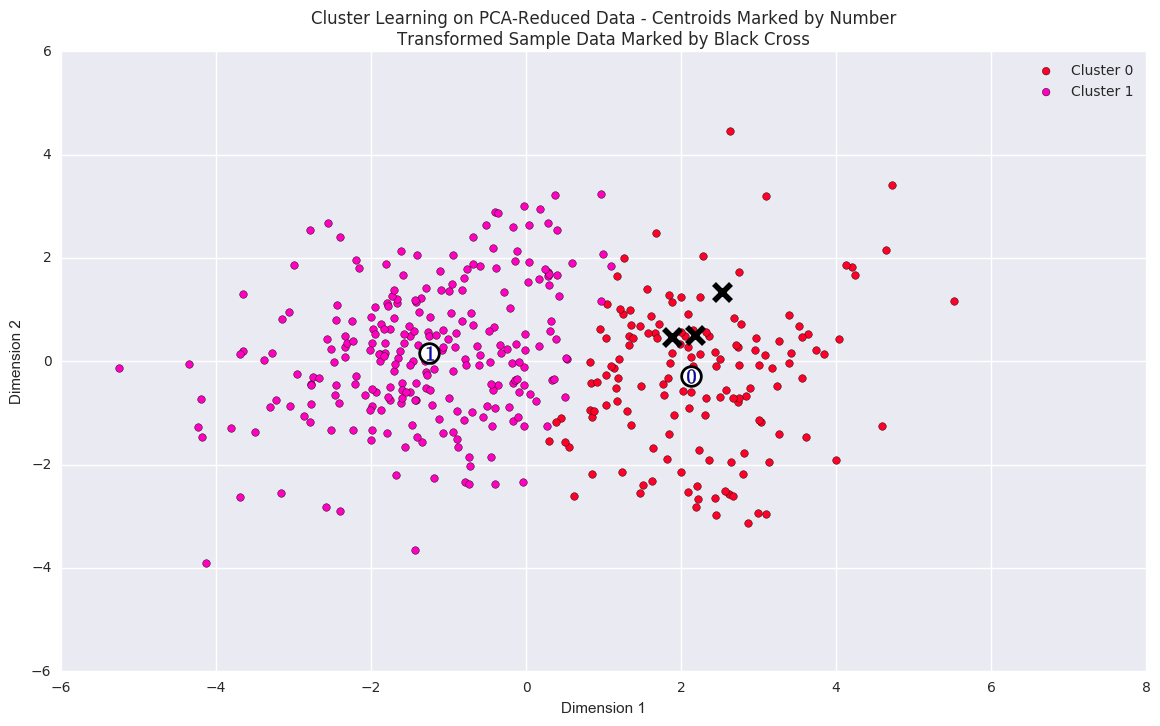

In [29]:
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [63]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
print("True centers")
display(true_centers)
print("True centers - mean")
display(true_centers - data.mean().round())
print("True centers - median")
display(true_centers - data.median().round())

True centers


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,6079.0,7042.0,10241.0,1275.0,3546.0,1159.0
Segment 1,8967.0,1920.0,2437.0,2081.0,309.0,741.0


True centers - mean


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,-5921.0,1246.0,2290.0,-1797.0,665.0,-366.0
Segment 1,-3033.0,-3876.0,-5514.0,-991.0,-2572.0,-784.0


True centers - median


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,-2425.0,3415.0,5485.0,-251.0,2730.0,193.0
Segment 1,463.0,-1707.0,-2319.0,555.0,-507.0,-225.0


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**
Compared to the median mean of the dataset we can see that customers in segment 0 purchase relatively  less fresh food and milk, but more grocery, frozen and paper. Indicating that it represents an establishments that store and sell food on demand, also considering it sells alot of paper and not much delicatessen, which fast food establishments does not sell much of.

A customer in segment 1 buy alot in all product ranges, except frozen compared to the mean and median for the customers. This indicates that this is an establishment that deals with several kind of products and sounds more like retail/grocery stores.


### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [64]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 0


**Answer:**
I previously predicted the following:" I would guess the first establishment (index=0) is a cafe because of the huge milk amount. The second establishment (index=1) looks more like a small market because it is lower for most of the features but not grocery, where it is high. Finally the third establishment (index=3) is a bit more tricky, I would guess a larger high end retailer with a fresh food counter."

In question 8 i assigned cluster 0 to be a fast food or restaurant type, where I predicted small market for the sample in the same cluster.
I assigned cluster 1 to represent retail/grocery store establishment, where I predicted cafe and high end retailer with fresh food counter for the sample. Which is maybe more correct for the last prediction for cluster 1 compared to the one for cluster 0.



## Conclusion

### Question 10
*Companies often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services. If the wholesale distributor wanted to change its delivery service from 5 days a week to 3 days a week, how would you use the structure of the data to help them decide on a group of customers to test?*  
**Hint:** Would such a change in the delivery service affect all customers equally? How could the distributor identify who it affects the most?

**Answer:**
As different businesses have different needs the clustering of customer types would definitely help. As this would mean that we could make sure that the A/B test actually hit the customers that we want. In this case there is a consideration to change from 5 days to 3 days a week. In this case domain knowledge would be the most important consideration to do. As we would ideally want to know two things. How could this change impact the customer in a negative way or positive way. For fresh food this would be very good, because this would mean that the food would be more fresh when arriving. Also it could alleviate the need for warehousing at the customer end. For frozen food delivery is not that important. If we look at the segments we see that segment 1 buy the most fresh food and least frozen food of the segments, indicating that it would be the best candidate for an A/B test of this kind. 

### Question 11
*Assume the wholesale distributor wanted to predict a new feature for each customer based on the purchasing information available. How could the wholesale distributor use the structure of the clustering data you've found to assist a supervised learning analysis?*  
**Hint:** What other input feature could the supervised learner use besides the six product features to help make a prediction?

**Answer:**
The clustering data tells us that we have found 2 distributions of customers. After doing A/B testing on a subset of the customers it would be relevant to know how this would impact all the other customers. One could train a supervised learner to try to predict this. By using clusters as a feature and the A/B testing results as a binary label (0 - Negative result for customer / 1 - Positive result for customer). By doing this one could train the learner to predict the outcome of an operational change similar to the one in A/B testing. By doing this the distributor would be able to get an estimate of the effect on the customers by predicting the outcome for customers that did not participate in the A/B testing, or for new customers.


### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier on to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

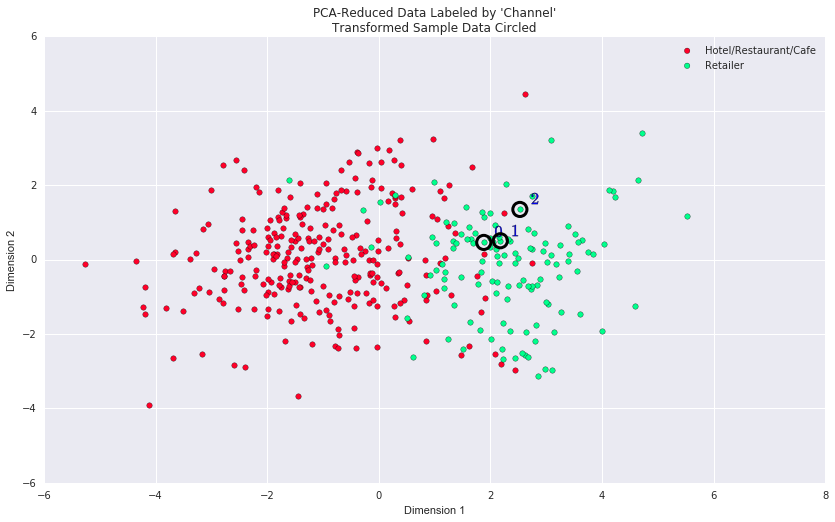

In [65]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**
The two distributions horeca and retail fit very well with the two clusters found by unsupervised ml methods (shown below). Also silouette scoring correctly identified the two clusters represented above by channels. It looks like I actually did predict to some degree of correctness the retail aspect as the retail channel overlaps very weel with the retail cluster. Also the horeca channel looks to overlap almost completely with my cafe/restaurant cluster. We see in reality that there is a bit more variance than predicted by GMM, meaning that the channels overlap on each other to some degree.

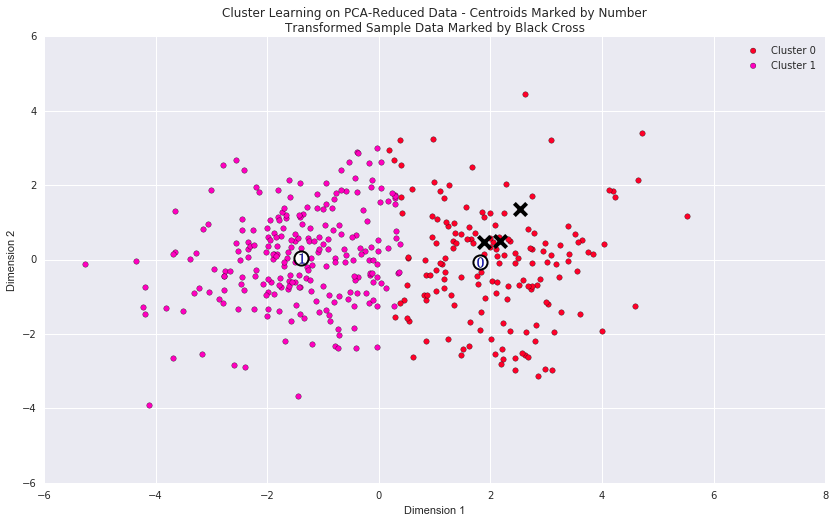

In [66]:
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples)

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.